# Reasons for using feature selection:
1. Improve data processing efficiency; reduce memory usage.
2. Reducing the number of features, to reduce overfitting and improve the generalization of models.
3. To gain a better understanding of the features and their relationship to the response variables.

# Feature selection overview

<hr/>

小鼠肾脏代谢组学.xlsx

WT-1 ~ 8 为control group, OIR-1 ~ 8为experiment group. Independent samples.

<hr/>


### 相关系数、info gain、etc


## 1. Load Data

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cla

In [17]:
# beware: EXCEL may cut off columns and save incomplete data
path = "metabolomics.txt"
data = pd.read_csv(path, delimiter = '\t') # ,header=None
X_names = data.iloc[:5022,4].values.tolist()
X = data.iloc[:5022,19:].T.values
y = np.array([0]*int(len(X)/2) + [1]*int(len(X)/2) )

X.shape, y.shape

((16, 5022), (16,))

In [ ]:
import pylab, matplotlib
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize = (24,8))

for c in set(y):    
    Xc = X[y == c]
    yc = y[y == c] 
    plt.scatter(X_names, np.mean(Xc,axis=0) + c*3*10e6, label= 'Class ' + str(c) + ' (' + str(len(yc)) + ' samples)') 
    plt.legend()

# plt.title(u'Averaged Spectrums for Each Category\n')
plt.xlabel(r'm/z')
plt.ylabel('Intensity')
plt.yticks([])

matplotlib.rcParams.update({'font.size': 10})

## 2. Make a classifiability analysis with cla

cla.metrics.get_metrics(X,y)

<pre>
{'classification.ACC': 1.0,
  'classification.Kappa': 1.0,
  'classification.F1_Score': 1.0,
  'classification.Jaccard': 1.0,
  'classification.Precision': 1.0,
  'classification.Recall': 1.0,
  'classification.CrossEntropy': 3.8652215771934146e-08,
  'classification.AP': 1.0,
  'classification.Brier': 1.1775589927875984e-14,
  'classification.ROC_AUC': 1.0,
  'classification.PR_AUC': 1.0,
  'classification.BER': 0.0,
  'correlation.IG.max': 0.7253718503718508,
  'correlation.r.max': 0.9473902863233524,
  'correlation.r.p.min': 2.601233179055872e-08,
  'correlation.rho.max': 0.8677218312746248,
  'correlation.rho.p.min': 1.329873727130143e-05,
  'correlation.tau.max': 0.7302967433402214,
  'correlation.tau.p.min': 0.0007775304469403846,
  'test.ES.max': 5.5373692024671515,
  'test.ANOVA.min': 2.601233179055904e-08,
  'test.ANOVA.min.log10': -7.5848207151481475,
  'test.ANOVA.F.max': 122.64983073772686,
  'test.MANOVA': 0.00224708,
  'test.MANOVA.log10': -2.6483814656582725,
  'test.MANOVA.F': 10.1095,
  'test.MWW.min': 0.00046955284955859495,
  'test.MWW.min.log10': -3.328315519521518,
  'test.MWW.U.min': 0.0,
  'test.KS.min': 0.00015540015540015537,
  'test.KS.min.log10': -3.8085485512404054,
  'test.KS.D.max': 1.0,
  'overlapping.F1.mean': 0.29540624419729367,
  'overlapping.F1.sd': 0.2013813320239405,
  'overlapping.F1v.mean': 0.7408278574273198,
  'overlapping.F1v.sd': 0.03313020408590226,
  'overlapping.F2.mean': 0.8125,
  'overlapping.F2.sd': 0.0,
  'overlapping.F3.mean': 0.0,
  'overlapping.F3.sd': 0.0,
  'overlapping.F4.mean': nan,
  'overlapping.F4.sd': 0.008051990067659668,
  'neighborhood.N1': 0.031185223435873426,
  'neighborhood.N2.mean': 0.2,
  'neighborhood.N2.sd': 0.4068381021724862,
  'neighborhood.N3.mean': 0.28626741800257505,
  'neighborhood.N3.sd': 0.06628412202991937,
  'neighborhood.N4.mean': 0.1875,
  'neighborhood.N4.sd': 0.4031128874149275,
  'neighborhood.T1.mean': 0.016227474706987863,
  'neighborhood.T1.sd': 0.06284873929116608,
  'neighborhood.LSC': 313.875,
  'linearity.L1.mean': 0.3125,
  'linearity.L1.sd': 0.0009956192751891676}
</pre>

## 根据 cla 分析结果，预计分类结果比较理想

## 3. Preview
### PCA降维（sklearn.decomposition.PCA）

rpy2 3.X may not support Windows. ECoL metrics may not be available.


D:\software\anaconda\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\software\anaconda\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


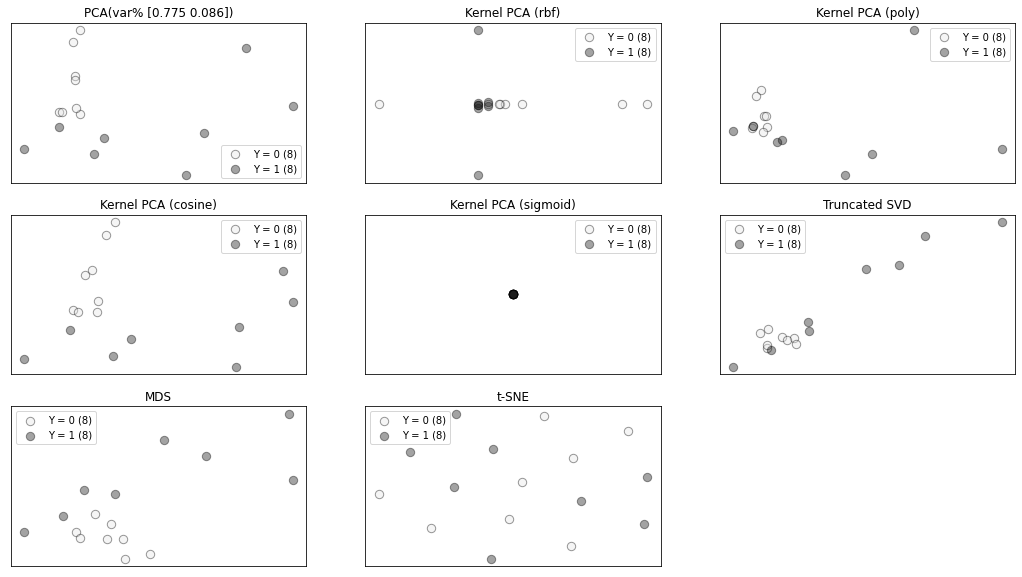

In [18]:
from cla import metrics
metrics.unsupervised_dimension_reductions(X, y)

直接用非监督降维查看数据的可分性如上. 下面进行feature selection，选取有利于分类的特征。

<hr/>

# Feature Selection

<Figure size 1440x1440 with 0 Axes>

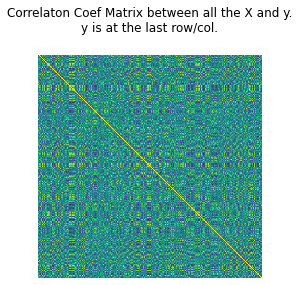

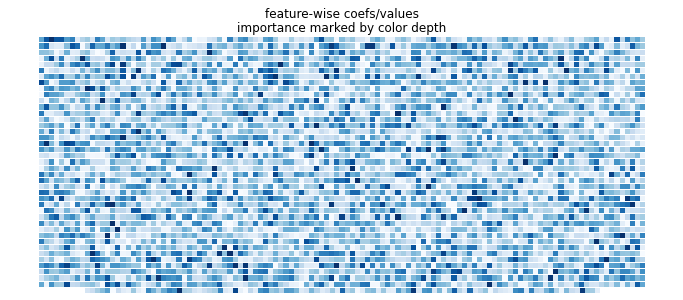

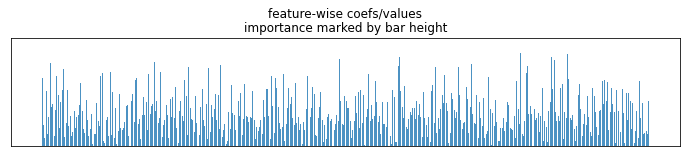

Important feature Number:  30
Important features indices:  [1819  969 2495    2 1212 4938 3954 3853 4431 2669 3735 4888 4984 4342
 4720 5017  970 4069 1510 2479 4703 4237 2956 4780 4210 1653 1172 1480
 1399 4349]
Important features names:  ['Shikimic acid' 'Pimelic acid' 'N-phenethyltridecanamide'
 'PC(14:1(9Z)/20:2(11Z,14Z))' 'Alanine' '2,4,6-octatrienal'
 '28-Homobrassinolide' 'Ethyl isopropyl disulfide' 'L-Histidine'
 '3-Indoxyl phosphate' 'bismuth subgallate' '3-Methylbenzaldehyde'
 '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid' 'SM(d18:1/18:1(9Z))'
 '2,3-dihydrobenzofuran' '6-Methylquinoline' 'Methylsuccinic acid'
 'N-Acetyl-9-O-acetylneuraminic acid' 'G? 6983'
 '3,4-Dihydroxyphenyl ethanol' 'Tetralin'
 'MG(0:0/22:4(7Z,10Z,13Z,16Z)/0:0)' 'Dihydronepetalactone' 'Guanine'
 'Daimuron' '1-O-(2R-methoxy-hexadecyl)-sn-glycerol' '2-Aminopyrazine'
 'Quinoxaline-2-carboxylic acid' "N3'-Acetyltobramycin"
 'L-3-Hydroxykynurenine']
Top-30 feature Importance:  [0.94739029 0.93587422 0.90749876 0

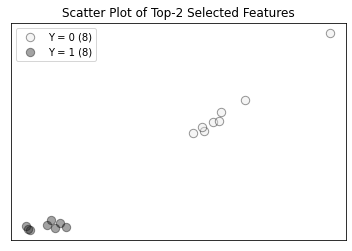

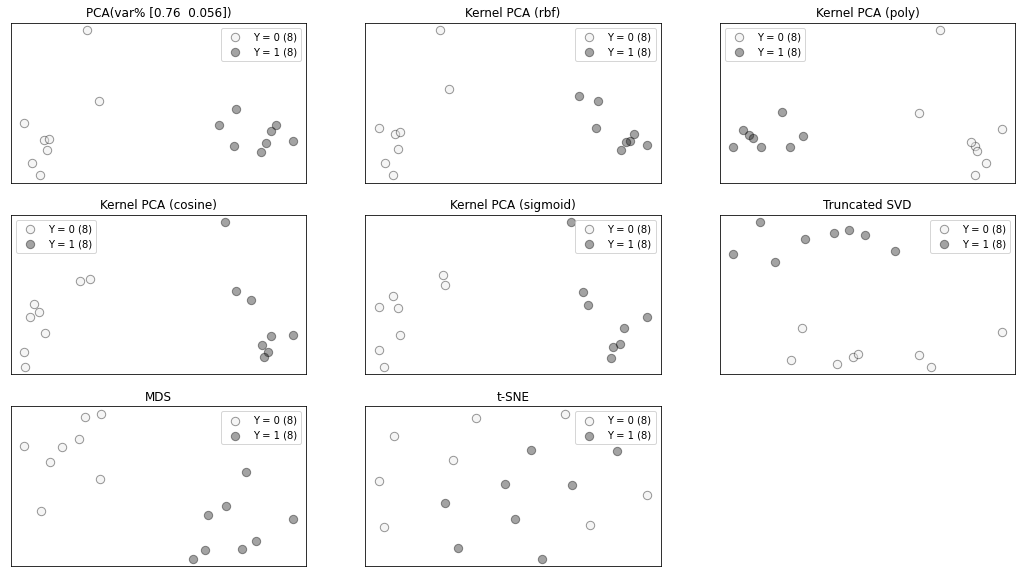

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


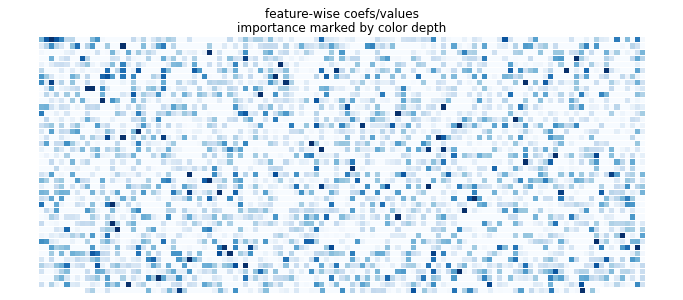

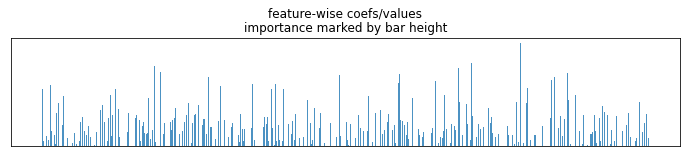

Important feature Number:  30
Important features indices:  [ 970  969 1819 3954 4817 2495 1212 2093 5017 1653    2  527 3254 4349
 4888 4938 4703 3614 4906 4480 1510 1254 3550 4984 2500    3 1123   91
  136  935]
Important features names:  ['Methylsuccinic acid' 'Pimelic acid' 'Shikimic acid'
 '28-Homobrassinolide' 'PE(18:1(11Z)/20:4(5Z,8Z,11Z,14Z))'
 'N-phenethyltridecanamide' 'Alanine' 'S1P Lyase Fluorogenic Substrate'
 '6-Methylquinoline' '1-O-(2R-methoxy-hexadecyl)-sn-glycerol'
 'PC(14:1(9Z)/20:2(11Z,14Z))' '7-Chloroemodin' 'p-Mentha-1,3,5,8-tetraene'
 'L-3-Hydroxykynurenine' '3-Methylbenzaldehyde' '2,4,6-octatrienal'
 'Tetralin' '2-Heptanethiol' '1-(3-Methyl-2-butenoyl)-6-apiosylglucose'
 'L-Histidinol' 'G? 6983' 'Abscisic alcohol'
 '(3beta,5alpha,6beta,7alpha,22E,24R)-Ergosta-8,22-diene-3,5,6,7-tetrol'
 '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid' '(Z)-13-Hexadecenoic acid'
 'L-Isoleucine' 'Debrisoquine' 'Isovalerylcarnitine' 'Nicotyrine'
 'L-Agaritine']
Top-30 feature Importance

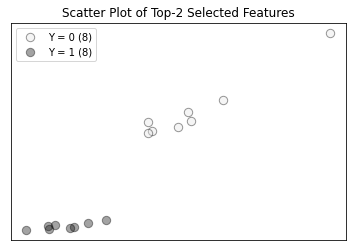

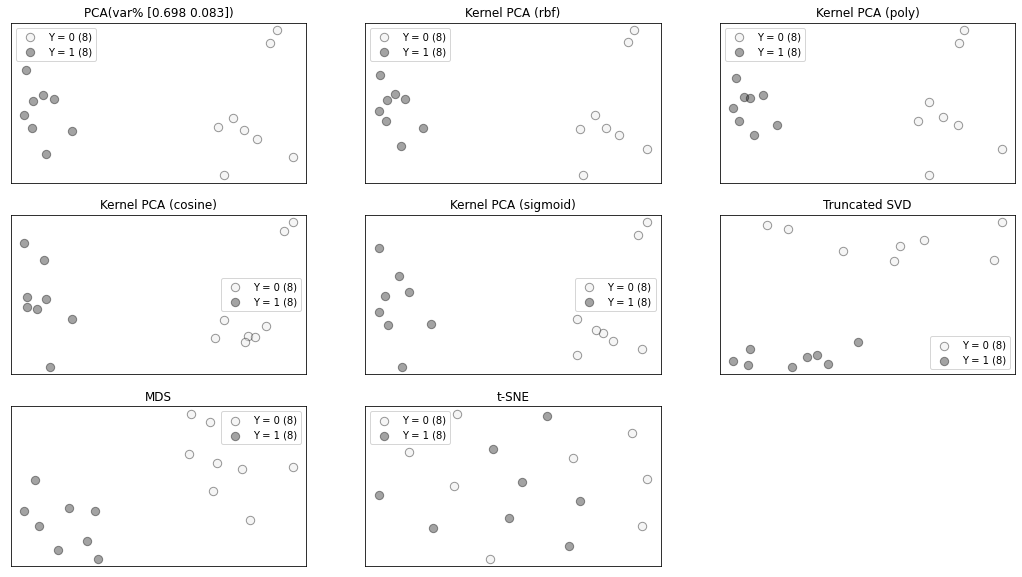

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


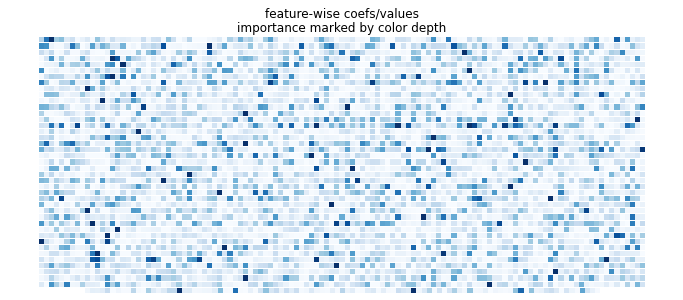

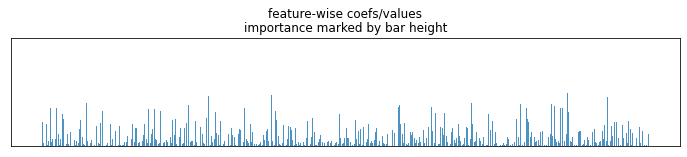

Important feature Number:  30
Important features indices:  [ 969 1819 1480 1212 2669 4661 4888 1254 3735 4720 4984 4938 2495 3297
 1172    2 4498 2479 4211 3555 1190 4431  684 4279 5005 4780 4374  323
 3853 1098]
Important features names:  ['Pimelic acid' 'Shikimic acid' 'Quinoxaline-2-carboxylic acid' 'Alanine'
 '3-Indoxyl phosphate' '2-Phenylethanol' '3-Methylbenzaldehyde'
 'Abscisic alcohol' 'bismuth subgallate' '2,3-dihydrobenzofuran'
 '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid' '2,4,6-octatrienal'
 'N-phenethyltridecanamide' '4-phenyl-5-methyl-1,2,3-Thiadiazole'
 '2-Aminopyrazine' 'PC(14:1(9Z)/20:2(11Z,14Z))' 'Guanosine'
 '3,4-Dihydroxyphenyl ethanol'
 "N-Acetyl-5'-hydroxysulfapyridine glucuronide"
 '1-Propanamine, N,N-dimethyl-3-(5-oxidodibenzo[b,e]thiepin-11(6H)-ylidene)-, (E)- (9CI)'
 'PC(2:0/0:0)[U]' 'L-Histidine' 'Osmundalactone' 'PS(O-16:0/19:1(9Z))'
 'Lotaustralin' 'Guanine' 'Piretanide glucuronide' '7-Methylinosine'
 'Ethyl isopropyl disulfide' 'Azaserine']
Top-30 feature

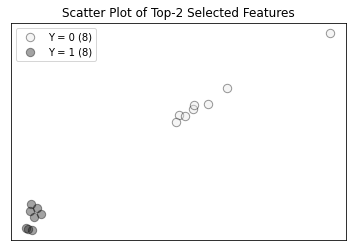

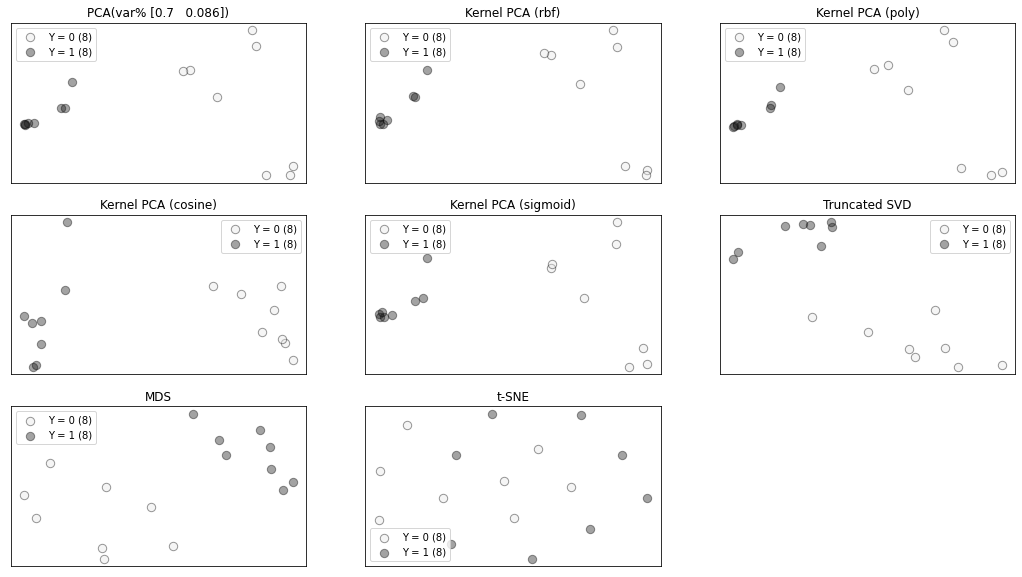

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


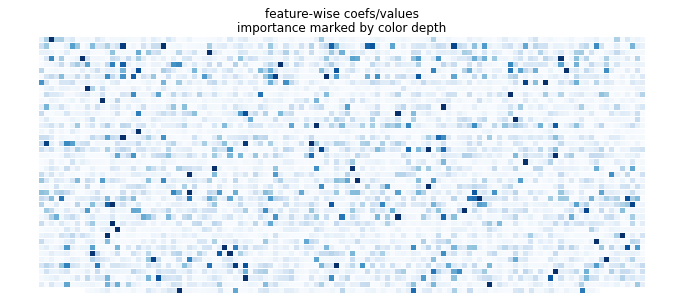

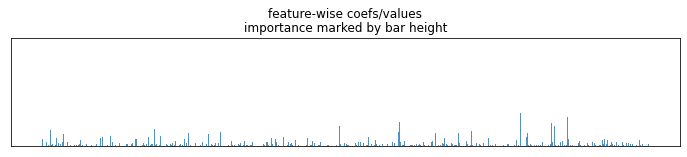

Important feature Number:  30
Important features indices:  [1819  969 2495    2 1212 4938 3954 3853 4431 2669 3735 4888 4984 4342
 4720 5017  970 4069 1510 2479 4703 4237 2956 4780 4210 1653 1172 1480
 1399 4349]
Important features names:  ['Shikimic acid' 'Pimelic acid' 'N-phenethyltridecanamide'
 'PC(14:1(9Z)/20:2(11Z,14Z))' 'Alanine' '2,4,6-octatrienal'
 '28-Homobrassinolide' 'Ethyl isopropyl disulfide' 'L-Histidine'
 '3-Indoxyl phosphate' 'bismuth subgallate' '3-Methylbenzaldehyde'
 '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid' 'SM(d18:1/18:1(9Z))'
 '2,3-dihydrobenzofuran' '6-Methylquinoline' 'Methylsuccinic acid'
 'N-Acetyl-9-O-acetylneuraminic acid' 'G? 6983'
 '3,4-Dihydroxyphenyl ethanol' 'Tetralin'
 'MG(0:0/22:4(7Z,10Z,13Z,16Z)/0:0)' 'Dihydronepetalactone' 'Guanine'
 'Daimuron' '1-O-(2R-methoxy-hexadecyl)-sn-glycerol' '2-Aminopyrazine'
 'Quinoxaline-2-carboxylic acid' "N3'-Acetyltobramycin"
 'L-3-Hydroxykynurenine']
Top-30 feature Importance:  [122.64983074  98.77641062  65.3443

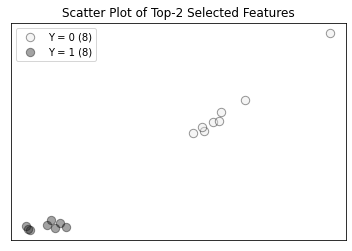

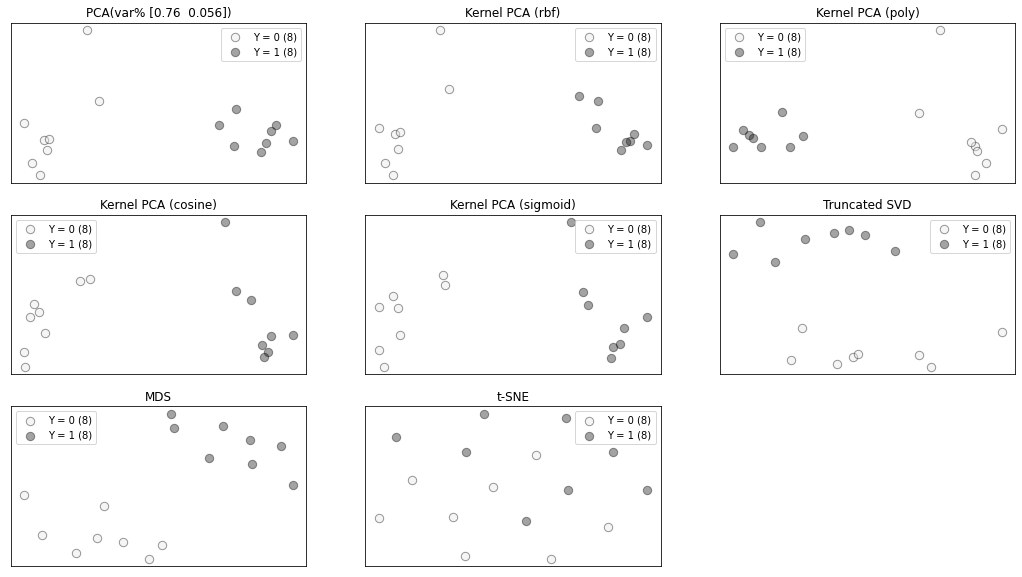

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


R2 =  1.0
LASSO alpha = 0.000156
Non-zero feature coefficients: 29


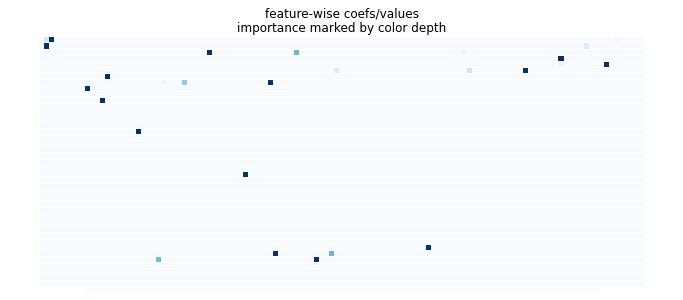

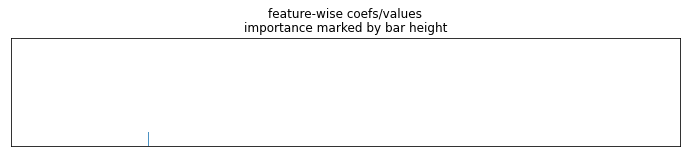

Important feature Number:  29
Important features indices:  [   2  969  121  695  462  733  273    1  885 1212 4246  290 4374 1819
  868 4257 4156  684  591 4343  227  113  658 2680  323  864  582 4289
  619]
Important features names:  ['PC(14:1(9Z)/20:2(11Z,14Z))' 'Pimelic acid' 'Zolmitriptan'
 'O-propanoyl-D-carnitine' '4-(Nitrosoamino)-1-(3-pyridinyl)-1-butanone'
 '(E)-1-O-Cinnamoyl-beta-D-glucose' 'N-Acetyl-D-glucosamine'
 'PE(P-18:0/20:4(6E,8Z,11Z,14Z)(5OH[S]))' '12-Hydroxydodecanoic acid'
 'Alanine' 'Leucokinin I' 'AMINOHYDROXYBUTYRIC ACID'
 'Piretanide glucuronide' 'Shikimic acid' 'Plastoquinol-1' 'Ramontoside'
 'Phyllanthusol B' 'Osmundalactone' 'Polidocanol'
 'Indole-3-carboxylic acid' 'Talaromycin A' 'ANETHOLE' 'Isoquinoline'
 'Dihydropanaxacol' '7-Methylinosine' '15-methyl-heptadecanoic acid'
 '15-octadecynoic acid' "N6,N6,O-Tridemethylpuromycin-5'-phosphate"
 '(±)-2-Methylthiazolidine']
Top-29 feature Importance:  [5.06181843e-01 4.56729203e-01 1.26132292e-01 9.58700504e-02


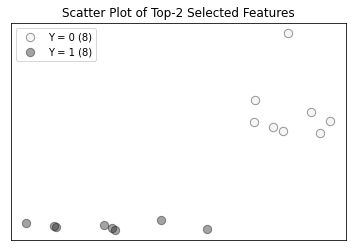

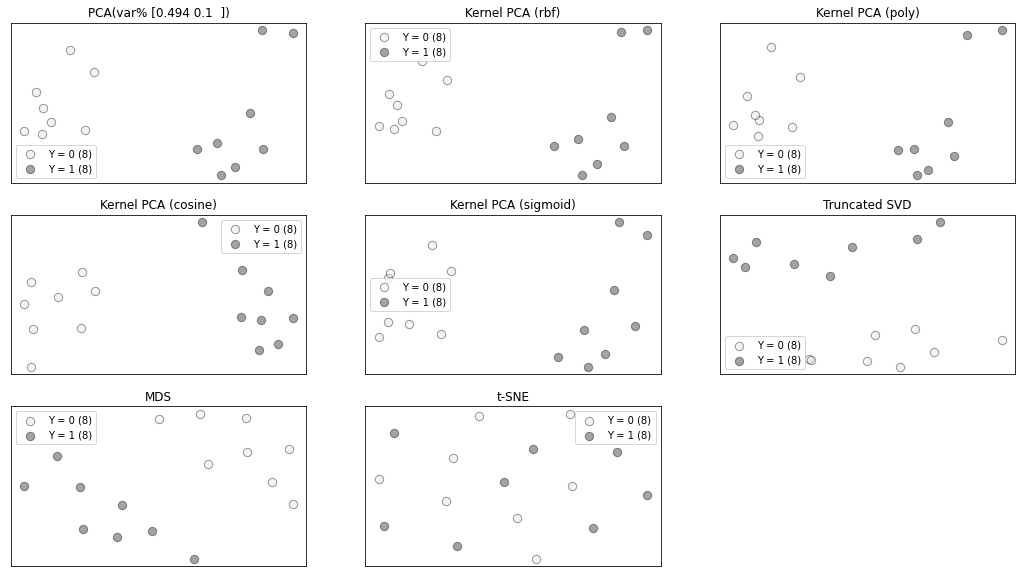

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


R2 =  1.0
alpha =  0.000313 , L1 ratio =  0.5
Non-zero feature coefficients: 44


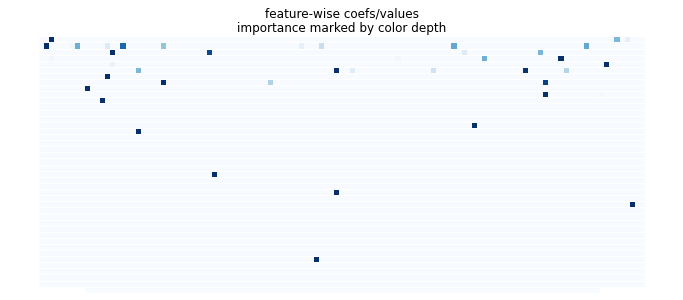

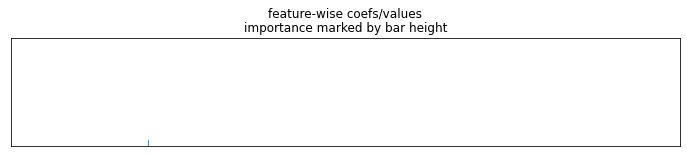

Important feature Number:  30
Important features indices:  [ 969    2 1212 1819  462  113  121  864  939  254 4374  136  273  447
  201  227  658  127  695  144  338  885  619  175  115  703  591  733
  133  677]
Important features names:  ['Pimelic acid' 'PC(14:1(9Z)/20:2(11Z,14Z))' 'Alanine' 'Shikimic acid'
 '4-(Nitrosoamino)-1-(3-pyridinyl)-1-butanone' 'ANETHOLE' 'Zolmitriptan'
 '15-methyl-heptadecanoic acid' '5-Hydroxylysine' 'm-Chlorobenzamide'
 'Piretanide glucuronide' 'Nicotyrine' 'N-Acetyl-D-glucosamine'
 'Germacrone-13-al' 'Oxypurinol' 'Talaromycin A' 'Isoquinoline'
 'beta-Alanyl-L-lysine' 'O-propanoyl-D-carnitine' '3-Vinylcatechol'
 'O-glutarylcarnitine' '12-Hydroxydodecanoic acid'
 '(±)-2-Methylthiazolidine' '(1x,2x)-Guaiacylglycerol 3-glucoside'
 '3-hydroxyisovalerylcarnitine' 'S-Acetyldihydrolipoamide-E' 'Polidocanol'
 '(E)-1-O-Cinnamoyl-beta-D-glucose' 'Cryptomeridiol'
 '1-(2-methoxy-13-methyl-tetradecanyl)-sn-glycero-3-phosphoserine']
Top-30 feature Importance:  [0.38886

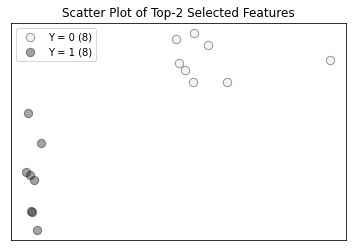

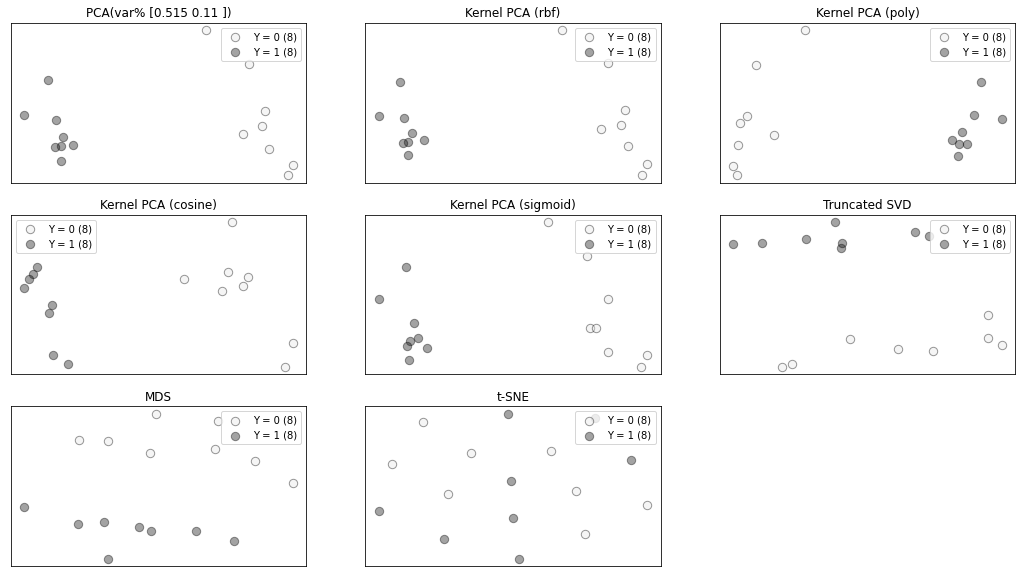

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


alpha =  0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


R2 =  1.0
Non-zero feature coefficients (eps =  0): 2556


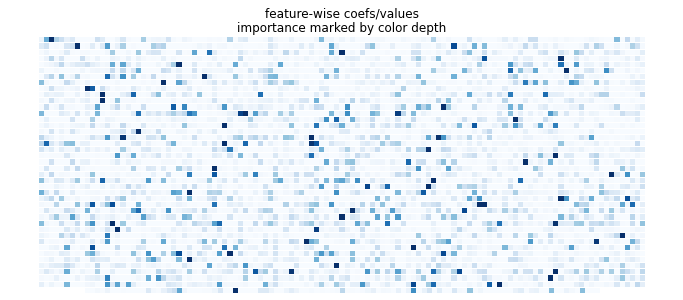

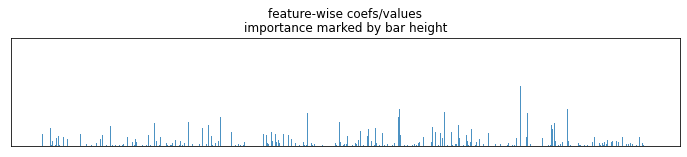

Important feature Number:  30
Important features indices:  [ 969 1819  970 4349 4780 1212 3954 4949 2495    2 4498 2752 2472 2236
 1653 3853  703 4237 4693 2381 2076 1092 2554  127 2674 2093 4279 3735
 4984 4703]
Important features names:  ['Pimelic acid' 'Shikimic acid' 'Methylsuccinic acid'
 'L-3-Hydroxykynurenine' 'Guanine' 'Alanine' '28-Homobrassinolide'
 'Isoguanosine' 'N-phenethyltridecanamide' 'PC(14:1(9Z)/20:2(11Z,14Z))'
 'Guanosine' 'Tris(butoxyethyl)phosphate' 'Adefovir' 'Alginic acid'
 '1-O-(2R-methoxy-hexadecyl)-sn-glycerol' 'Ethyl isopropyl disulfide'
 'S-Acetyldihydrolipoamide-E' 'MG(0:0/22:4(7Z,10Z,13Z,16Z)/0:0)'
 '3-Hydroxyphenylacetic acid' 'beta-Geraniol' 'Kikkanol A' 'β-Alanine'
 'D-Cysteine' 'beta-Alanyl-L-lysine' 'Serylleucine'
 'S1P Lyase Fluorogenic Substrate' 'PS(O-16:0/19:1(9Z))'
 'bismuth subgallate' '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid'
 'Tetralin']
Top-30 feature Importance:  [5.52717796e-15 5.52295570e-15 4.56564374e-15 3.54204744e-15
 3.34798389e-15

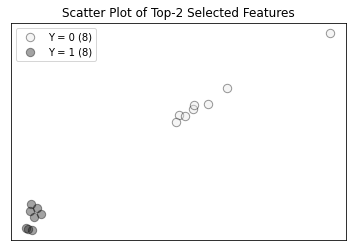

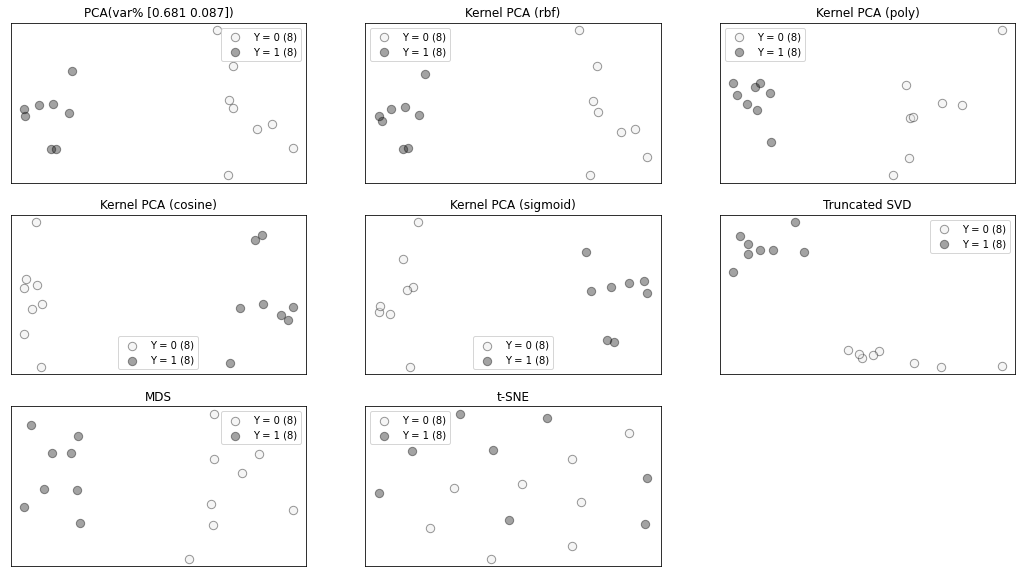

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [02:24<00:00,  5.34s/it]


top-30 common features and their frequencies:  [(969, 22), (1819, 19), (1212, 18), (2, 16), (4938, 16), (1, 14), (970, 13), (4780, 12), (2669, 11), (1480, 11), (4431, 10), (2495, 8), (4498, 8), (4949, 8), (3356, 8), (4720, 7), (2500, 7), (4279, 7), (4342, 7), (1487, 7), (2479, 6), (939, 6), (1816, 6), (4661, 5), (3953, 5), (113, 5), (1459, 5), (3089, 5), (4374, 5), (2045, 5)]


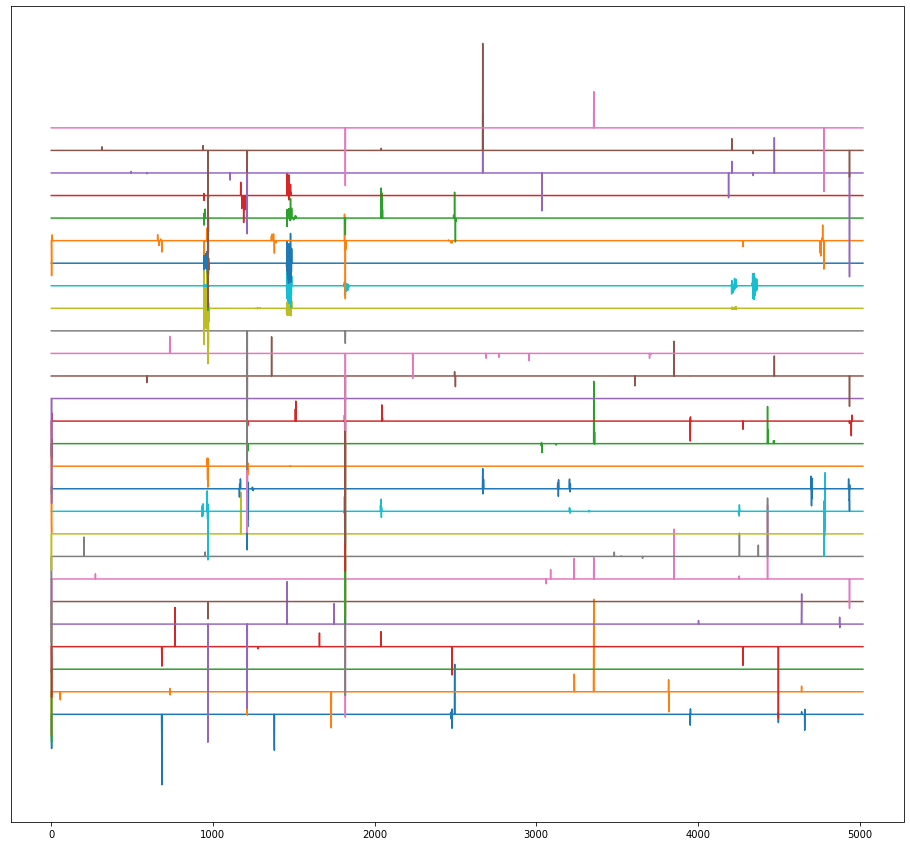

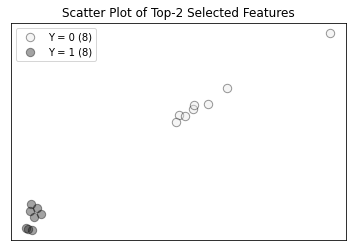

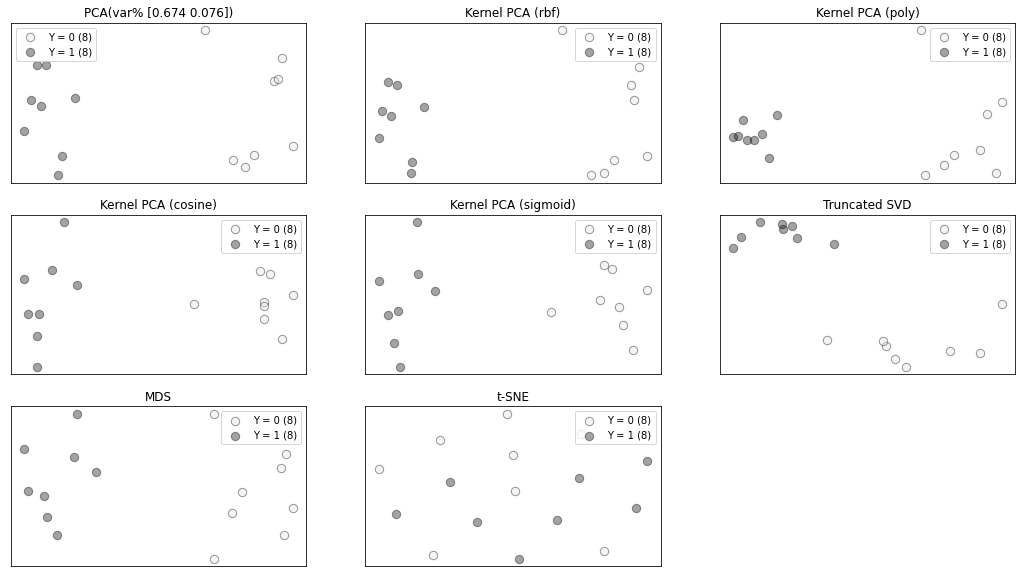

Classification accurary with the selected features (LogisticRegressionCV) =  1.0


Be patient. Your data is high-dimensional. It will take long time.
R2 = -0.194
Non-zero feature coefficients: 6


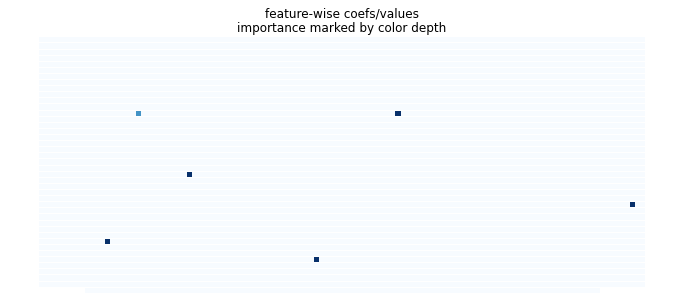

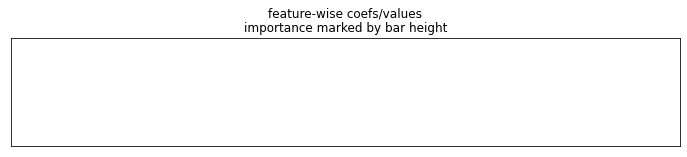

Important feature Number:  6
Important features indices:  [2669 3356 1510 1459 4374 3973]
Important features names:  ['3-Indoxyl phosphate' 'Cromoglicic acid' 'G? 6983'
 '2-Phenylpropionaldehyde dimethyl acetal' 'Piretanide glucuronide'
 'L-902,688']
Top-6 feature Importance:  [0.15772273 0.14534578 0.12601856 0.07804902 0.0395402  0.03280003]


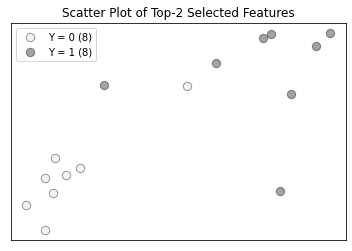

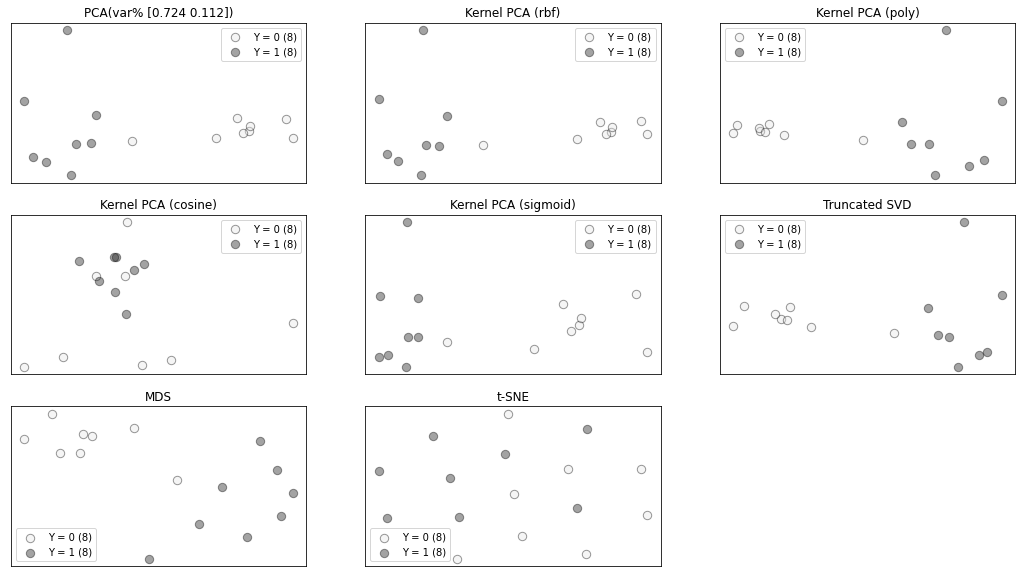

Classification accurary with the selected features (LogisticRegressionCV) =  0.938


In [19]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

from qsi import fs
_, FS_IDX = fs.RUN_ALL_FS(X_mm_scaled, y, X_names, N = 30,output='all')

In [20]:
FS_IDX

{'pearsion-r': array([1819,  969, 2495,    2, 1212, 4938, 3954, 3853, 4431, 2669, 3735,
        4888, 4984, 4342, 4720, 5017,  970, 4069, 1510, 2479, 4703, 4237,
        2956, 4780, 4210, 1653, 1172, 1480, 1399, 4349], dtype=int64),
 'info-gain / mutual information': array([ 970,  969, 1819, 3954, 4817, 2495, 1212, 2093, 5017, 1653,    2,
         527, 3254, 4349, 4888, 4938, 4703, 3614, 4906, 4480, 1510, 1254,
        3550, 4984, 2500,    3, 1123,   91,  136,  935], dtype=int64),
 'chi-squared statistic': array([ 969, 1819, 1480, 1212, 2669, 4661, 4888, 1254, 3735, 4720, 4984,
        4938, 2495, 3297, 1172,    2, 4498, 2479, 4211, 3555, 1190, 4431,
         684, 4279, 5005, 4780, 4374,  323, 3853, 1098], dtype=int64),
 'anova statistic': array([1819,  969, 2495,    2, 1212, 4938, 3954, 3853, 4431, 2669, 3735,
        4888, 4984, 4342, 4720, 5017,  970, 4069, 1510, 2479, 4703, 4237,
        2956, 4780, 4210, 1653, 1172, 1480, 1399, 4349], dtype=int64),
 'lasso': array([   2,  969,  12

In [33]:
list1=FS_IDX['pearsion-r']
del FS_IDX['group lasso']
del FS_IDX['adaptive elastic net']
for i in FS_IDX.values():
    i=list(i)
    list1=np.intersect1d(list1, i)
    print(i)
list1=list(list1)

[1819, 969, 2495, 2, 1212, 4938, 3954, 3853, 4431, 2669, 3735, 4888, 4984, 4342, 4720, 5017, 970, 4069, 1510, 2479, 4703, 4237, 2956, 4780, 4210, 1653, 1172, 1480, 1399, 4349]
[970, 969, 1819, 3954, 4817, 2495, 1212, 2093, 5017, 1653, 2, 527, 3254, 4349, 4888, 4938, 4703, 3614, 4906, 4480, 1510, 1254, 3550, 4984, 2500, 3, 1123, 91, 136, 935]
[969, 1819, 1480, 1212, 2669, 4661, 4888, 1254, 3735, 4720, 4984, 4938, 2495, 3297, 1172, 2, 4498, 2479, 4211, 3555, 1190, 4431, 684, 4279, 5005, 4780, 4374, 323, 3853, 1098]
[1819, 969, 2495, 2, 1212, 4938, 3954, 3853, 4431, 2669, 3735, 4888, 4984, 4342, 4720, 5017, 970, 4069, 1510, 2479, 4703, 4237, 2956, 4780, 4210, 1653, 1172, 1480, 1399, 4349]
[2, 969, 121, 695, 462, 733, 273, 1, 885, 1212, 4246, 290, 4374, 1819, 868, 4257, 4156, 684, 591, 4343, 227, 113, 658, 2680, 323, 864, 582, 4289, 619]
[969, 2, 1212, 1819, 462, 113, 121, 864, 939, 254, 4374, 136, 273, 447, 201, 227, 658, 127, 695, 144, 338, 885, 619, 175, 115, 703, 591, 733, 133, 677]
[9

In [35]:
final=[]
for i in list1:
    name=X_names[i]
    final.append(name)
final

['PC(14:1(9Z)/20:2(11Z,14Z))', 'Pimelic acid', 'Alanine', 'Shikimic acid']

In [36]:
data_x=pd.DataFrame(X)
data1=data_x[list1]
data1['y']=y
# data1.to_excel("C:/Users/54479/Desktop/result.xlsx")
data1

,2,969,1212,1819,y
0,6650941.308,5293.279185,1228.154503,16289.101850,0
1,6157117.532,4029.931722,1125.272988,13591.465370,0
2,6152907.270,3618.652993,1327.103551,12608.988100,0
3,6580009.403,3450.971464,1331.583274,12314.000420,0
4,6994501.676,3799.035938,1139.203947,12846.676990,0
5,7127520.513,3412.600350,1132.855759,11983.031520,0
6,6427562.917,3519.489312,1318.039945,12238.971800,0
7,7277058.057,3632.931292,1274.958711,12796.924570,0
8,2767819.284,1720.414239,910.024933,7788.138274,1
9,3213124.104,1641.133309,977.461826,7990.010486,1


In [37]:
from scipy.stats import pearsonr,spearmanr
from sklearn.feature_selection import mutual_info_classif
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]
info_gain=mutual_info_classif(x,y)
pc=[]
sp=[]
for i in range(4):
    x=data1.iloc[:,i]
    p = pearsonr(x,y)
    s = spearmanr(x,y)
    pc.append(p)
    sp.append(s)
pc,sp
pc=pd.DataFrame(pc)
sp=pd.DataFrame(sp)
print('pearsonr:',pc)
print('spearmanr:',sp)
print(info_gain)

pearsonr:           0             1
0 -0.903853  1.574406e-06
1 -0.935874  1.008097e-07
2 -0.893101  3.210701e-06
3 -0.947390  2.601233e-08
spearmanr:    correlation    pvalue
0    -0.867722  0.000013
1    -0.867722  0.000013
2    -0.867722  0.000013
3    -0.867722  0.000013
[0.65706828 0.72537185 0.70453852 0.72537185]


In [11]:
import numpy as np

lasso_fs = np.array(['PC(14:1(9Z)/20:2(11Z,14Z))', 'Pimelic acid', 'Zolmitriptan',
 'O-propanoyl-D-carnitine', '4-(Nitrosoamino)-1-(3-pyridinyl)-1-butanone',
 '(E)-1-O-Cinnamoyl-beta-D-glucose', 'N-Acetyl-D-glucosamine',
 'PE(P-18:0/20:4(6E,8Z,11Z,14Z)(5OH[S]))', '12-Hydroxydodecanoic acid',
 'Alanine', 'Leucokinin I', 'AMINOHYDROXYBUTYRIC ACID',
 'Piretanide glucuronide', 'Shikimic acid', 'Plastoquinol-1', 'Ramontoside',
 'Phyllanthusol B', 'Osmundalactone', 'Polidocanol',
 'Indole-3-carboxylic acid', 'Talaromycin A', 'ANETHOLE', 'Isoquinoline',
 'Dihydropanaxacol', '7-Methylinosine', '15-methyl-heptadecanoic acid',
 '15-octadecynoic acid' "N6,N6,O-Tridemethylpuromycin-5'-phosphate",
 '(±)-2-Methylthiazolidine'])

enet_fs = np.array( ['Pimelic acid', 'PC(14:1(9Z)/20:2(11Z,14Z))', 'Alanine', 'Shikimic acid',
 '4-(Nitrosoamino)-1-(3-pyridinyl)-1-butanone', 'ANETHOLE', 'Zolmitriptan',
 '15-methyl-heptadecanoic acid', '5-Hydroxylysine', 'm-Chlorobenzamide',
 'Piretanide glucuronide', 'Nicotyrine', 'N-Acetyl-D-glucosamine',
 'Germacrone-13-al', 'Oxypurinol', 'Talaromycin A', 'Isoquinoline',
 'beta-Alanyl-L-lysine', 'O-propanoyl-D-carnitine', '3-Vinylcatechol',
 'O-glutarylcarnitine', '12-Hydroxydodecanoic acid',
 '(±)-2-Methylthiazolidine', '(1x,2x)-Guaiacylglycerol 3-glucoside',
 '3-hydroxyisovalerylcarnitine', 'S-Acetyldihydrolipoamide-E', 'Polidocanol',
 '(E)-1-O-Cinnamoyl-beta-D-glucose', 'Cryptomeridiol',
 '1-(2-methoxy-13-methyl-tetradecanyl)-sn-glycero-3-phosphoserine'] )

alasso_fs = np.array ( ['Pimelic acid', 'Shikimic acid', 'Methylsuccinic acid',
 'L-3-Hydroxykynurenine', 'Guanine', 'Alanine', '28-Homobrassinolide',
 'Isoguanosine', 'N-phenethyltridecanamide', 'PC(14:1(9Z)/20:2(11Z,14Z))',
 'Guanosine', 'Tris(butoxyethyl)phosphate', 'Adefovir', 'Alginic acid',
 '1-O-(2R-methoxy-hexadecyl)-sn-glycerol', 'Ethyl isopropyl disulfide',
 'S-Acetyldihydrolipoamide-E', 'MG(0:0/22:4(7Z,10Z,13Z,16Z)/0:0)',
 '3-Hydroxyphenylacetic acid', 'beta-Geraniol', 'Kikkanol A', 'β-Alanine',
 'D-Cysteine', 'beta-Alanyl-L-lysine', 'Serylleucine',
 'S1P Lyase Fluorogenic Substrate', 'PS(O-16:0/19:1(9Z))',
 'bismuth subgallate', '5-Acetoxy-tetradeca-2E,4E,6E-trienoic acid',
 'Tetralin'] )

np.intersect1d ( np.intersect1d(lasso_fs, enet_fs) , alasso_fs)

array(['Alanine', 'PC(14:1(9Z)/20:2(11Z,14Z))', 'Pimelic acid',
       'Shikimic acid'], dtype='<U63')